In [1]:
from MemSE import ROOT
from MemSE.nas import ResNetArchEncoder
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

encoder = ResNetArchEncoder()
idx_start_gmax = encoder.gmax_info["L"][0]
gap = torch.load(ROOT / 'experiments/conference_2/results/ga_results_pymoo_AccuracyPredictor.pth')
gap_cs = torch.load(ROOT / 'experiments/conference_2/results/ga_results_pymoo_const_SigmoidAccuracyPredictor.pth')
gap_feat = []
gap_cs_feat = []
for _, res in gap.items():
    bv, bi = res
    arch = bi[1]
    feat = encoder.arch2feature(arch)[:idx_start_gmax]
    gap_feat.append(feat)
for _, res in gap_cs.items():
    bv, bi = res
    arch = bi[1]
    feat = encoder.arch2feature(arch)[:idx_start_gmax]
    gap_cs_feat.append(feat)

/home/sebwood/projects/def-franlp/sebwood/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# TODO check accuracy in evals
# for a given level of accuracy on gap_feat find the closest gap_cs_feat point in the multed array
# plot both simultaneously

In [2]:
g_f = np.array(gap_feat)
gfn = np.unique(g_f / (g_f.max(axis=0) + 1e-6), axis=0)
print('Regular GA found ', len(gfn)/len(g_f), ' are unique')
gc_f = np.array(gap_cs_feat)
gcfn = np.unique(gc_f / (gc_f.max(axis=0) + 1e-6), axis=0)
print('Regular GA found ', len(gcfn)/len(gc_f), ' are unique')

Regular GA found  1.0  are unique
Regular GA found  1.0  are unique


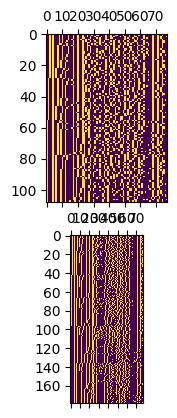

In [3]:
splot, axs = plt.subplots(2)
axs[0].matshow(gfn)
axs[1].matshow(gcfn)

In [4]:
from sklearn.manifold import TSNE
cat = np.concatenate((gfn, gcfn))
y_cat = np.array(gfn.shape[0] * [0] + gcfn.shape[0] * [1])
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(cat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 287 samples in 0.001s...
[t-SNE] Computed neighbors for 287 samples in 5.642s...
[t-SNE] Computed conditional probabilities for sample 287 / 287
[t-SNE] Mean sigma: 1.458548
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.124111
[t-SNE] KL divergence after 300 iterations: 0.963377


/tmp/ipykernel_1414146/1496558829.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: >

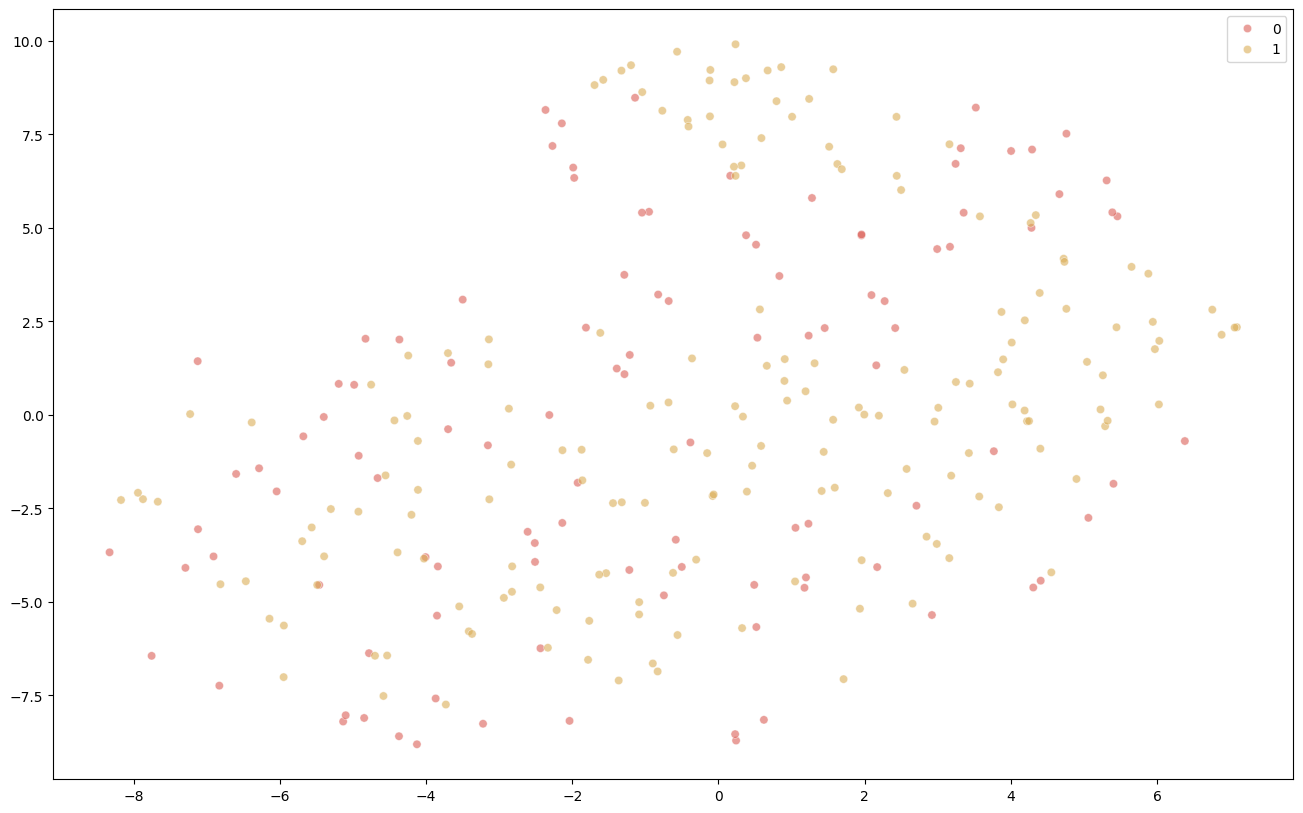

In [6]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=y_cat,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.6
)